In [3]:
import pandas as pd

file_path = '/content/creditcard.csv'
df = pd.read_csv(file_path)

# Read the CSV file into a Dataframe
df= pd.read_csv(file_path)

#Print the first 5 rows of the Dataframe
print(df.head(5))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


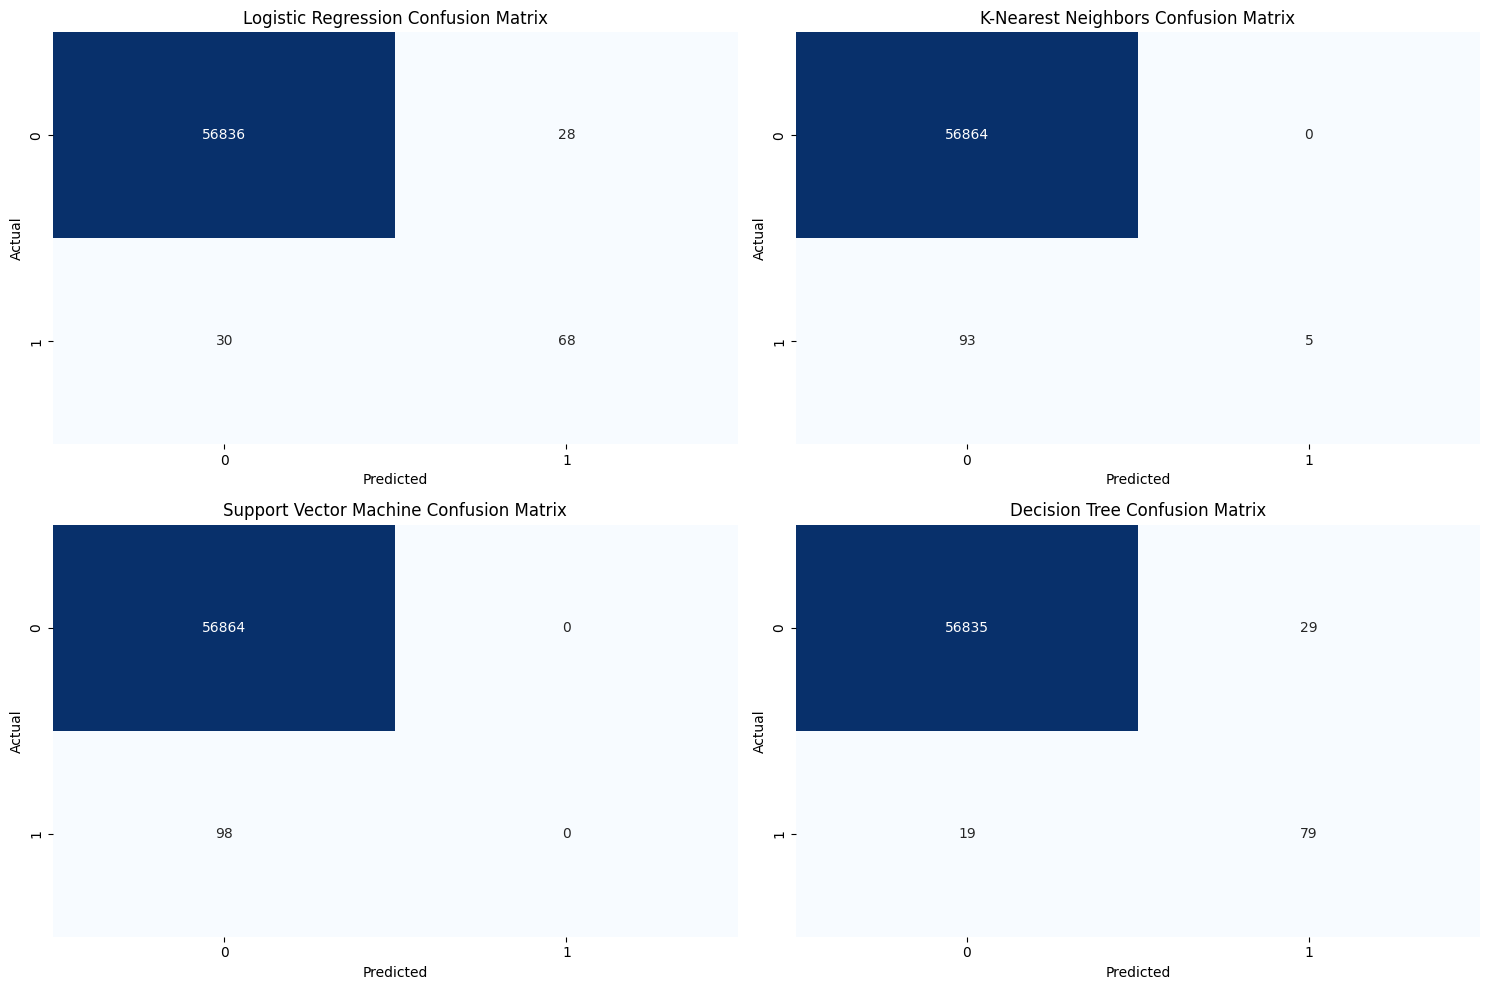

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


# Read the CSV file into a Dataframe
df= pd.read_csv(file_path)

# Features (X) and target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

# Step 2 and 3: Train models and make predictions
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)

# Step 4: Plot confusion matrices
plt.figure(figsize=(15, 10))

for i, (name, pred) in enumerate(predictions.items(), 1):
    plt.subplot(2, 2, i)
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()


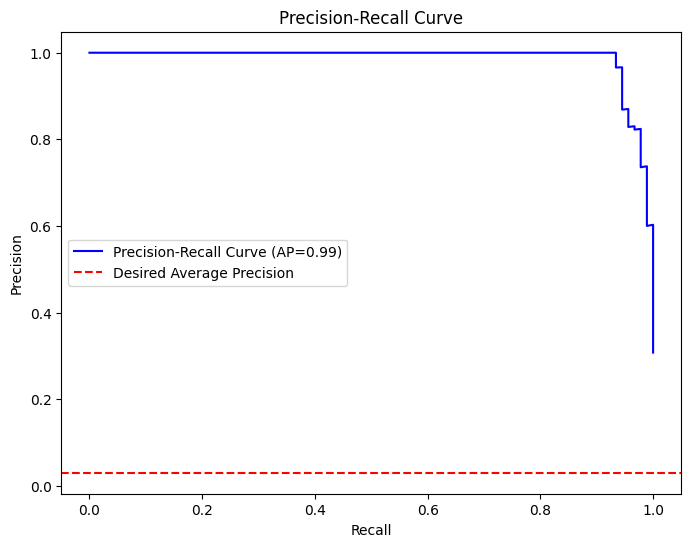

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

# Read the CSV file into a Dataframe
df= pd.read_csv(file_path)

# Features (X) and target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Step 1: Implement under-sampling to balance the classes
undersampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Step 2: Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 3: Train your model on the undersampled data
# For example, using Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Step 4: Calculate precision, recall, and plot the precision-recall curve
y_prob = model.predict_proba(X_test_scaled)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'Precision-Recall Curve (AP={average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.axhline(y=0.03, color='red', linestyle='--', label='Desired Average Precision')
plt.legend(loc='best')
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Read the CSV file into a Dataframe
df= pd.read_csv(file_path)


# Features (X) and target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features, especially for Logistic Regression and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the models
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_scaled, y_train)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Predictions
logistic_regression_pred = logistic_regression_model.predict(X_test_scaled)
knn_pred = knn_model.predict(X_test_scaled)
svm_pred = svm_model.predict(X_test_scaled)
decision_tree_pred = decision_tree_model.predict(X_test)

# Calculate accuracy scores
logistic_regression_score = accuracy_score(y_test, logistic_regression_pred)
knn_score = accuracy_score(y_test, knn_pred)
svm_score = accuracy_score(y_test, svm_pred)
decision_tree_score = accuracy_score(y_test, decision_tree_pred)

# Print the scores
print(f'Logistic Regression Score: {logistic_regression_score:.4f}')
print(f'K-Nearest Neighbors Score: {knn_score:.4f}')
print(f'Support Vector Machine Score: {svm_score:.4f}')
print(f'Decision Tree Score: {decision_tree_score:.4f}')


Logistic Regression Score: 0.9991
K-Nearest Neighbors Score: 0.9995
Support Vector Machine Score: 0.9993
Decision Tree Score: 0.9990
